In [1]:
import cv2
import glob
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import re
import sys

from collections import defaultdict
from scipy import misc

%matplotlib inline

In [2]:
def get_hero_percent(img_dir):
    """Finds the percent of images in which hero is present. By tokyo_adam 4-10-17

    Looks through the /data/[train, validation]/masks directory to
    find images (*.png) with blue (hero is always in blue) color in them.

    Args:
        img_dir: directory with labelled images. Typically, path to
                 /masks directory

    Returns:
        percent_hero: percentage of images with hero in them
        total_files: total number of images
        num_blue_pix: a list of number of blue pixels per image
        img_shape: x by y resolution of the images

    """
    total_files = 0
    total_hero = 0
    num_blue_pix = []

    image_files = glob.glob(os.path.join(img_dir, '*.png'))
    img_shape = cv2.imread(image_files[0]).shape[:-1]
    for file in image_files:
        total_files +=1

        img = cv2.imread(file)
        blue = img[:,:,0]
        num_blue_pix.append(np.count_nonzero(blue))

        if np.any(blue == 255):
            total_hero += 1

    percent_hero = 100. * total_hero / total_files
    
    return percent_hero, total_files, num_blue_pix, img_shape

In [3]:
def flip_and_save_images(img_dir, extension):
    """Doubles the image dataset by flipping each image. By Mithi Sevilla
    
    Looks through a directory for a given image file extension and flipps
    all the images and saves them with a "flipped" prefix.

    Args:
        img_dir: path to directory with images.
        extension: file extension for the images. Ex: 'png', 'jpeg'

    """
    files = glob.glob(os.path.join(img_dir, '*.' + extension))
    for i, file in enumerate(files):
        # print(i)
        img = misc.imread(file, flatten=False, mode='RGB')
        flipped_img = np.fliplr(img)
        flipped_name = 'flipped_' + os.path.basename(file)
        flipped_path = os.path.join(img_dir, flipped_name)
        misc.imsave(flipped_path, flipped_img)

In [4]:
def hero_distribution(input_data, title, num_bins, data_range, color='green', show_data=True):
    """Plots a histogram of input_data. By @robottrainer
    
    Looks through a directory for a given image file extension and flipps
    all the images and saves them with a "flipped" prefix.

    Args:
        input_data: list or 1d array. list of blue pixel counts
        title: string. title of the plot
        num_bins: int. number of bins in the histogram
        data_range: tuple. minimum and maximum values to include in the plot
        color: string. color of the plot

    """
    # the histogram of the data
    n, bins, patches = plt.hist(input_data, bins=num_bins, range=data_range, facecolor=color, alpha=0.75)

    if show_data:
        bins_edges = [(int(x), int(bins[i+1])) for i, x in enumerate(bins[:-1])]
        for binn, count in zip(bins_edges, n):
            print('[{0}, {1}) - {2}'.format(binn[0], binn[1], int(count)))

    plt.xlabel('size bins in pixels')
    plt.ylabel('num images in bin')
    plt.title(title)
    plt.grid(True)

    plt.show()

    print('total images with {0} pixels to {1} pixels = {2}'.format(data_range[0], data_range[1], np.sum(n)))

In [5]:
def max_min_mean(input_data):
    print('min =', min(input_data))
    print('max =', max(input_data))
    print('mean =', np.mean(input_data))

In [6]:
# my dirs
home = !echo "$HOME"
data_dir = home[0] + '/Coursework/RoboND/robond-github/RoboND-DeepLearning-Project/data/'
train_masks = home[0] + "/Coursework/RoboND/robond-github/RoboND-DeepLearning-Project/data/train/masks/"
train_images = home[0] + "/Coursework/RoboND/robond-github/RoboND-DeepLearning-Project/data/train/images/"

In [7]:
# check the percent of images with hero
hero_percent, total_files, num_blues, img_shape = get_hero_percent(train_masks)

print("{0:.2f}% of images contain the hero".format(hero_percent))
print("total number of images =", total_files)
print("total number of images with hero =", total_files * hero_percent/100)

print("length of blue pixel list =", len(num_blues))
print("{0:.2f}% of files with > 0 blue pixels".format(np.count_nonzero(num_blues)/total_files * 100))

num_blues_normed = [x/(img_shape[0] * img_shape[1]) for x in num_blues]

max_min_mean(num_blues)
max_min_mean(num_blues_normed)

37.64% of images contain the hero
total number of images = 4131
total number of images with hero = 1555.0
length of blue pixel list = 4131
37.64% of files with > 0 blue pixels
min = 0
max = 18990
mean = 173.628419269
min = 0.0
max = 0.289764404296875
mean = 0.00264935942488


[0, 400) - 3718
[400, 800) - 20
[800, 1200) - 16
[1200, 1600) - 308
[1600, 2000) - 35
[2000, 2400) - 28
[2400, 2800) - 1
[2800, 3200) - 1
[3200, 3600) - 0
[3600, 4000) - 0
[4000, 4400) - 1
[4400, 4800) - 0
[4800, 5200) - 0
[5200, 5600) - 0
[5600, 6000) - 0
[6000, 6400) - 0
[6400, 6800) - 0
[6800, 7200) - 0
[7200, 7600) - 0
[7600, 8000) - 1
[8000, 8400) - 0
[8400, 8800) - 0
[8800, 9200) - 0
[9200, 9600) - 0
[9600, 10000) - 0
[10000, 10400) - 0
[10400, 10800) - 0
[10800, 11200) - 0
[11200, 11600) - 0
[11600, 12000) - 0
[12000, 12400) - 0
[12400, 12800) - 0
[12800, 13200) - 0
[13200, 13600) - 0
[13600, 14000) - 0
[14000, 14400) - 1
[14400, 14800) - 0
[14800, 15200) - 0
[15200, 15600) - 0
[15600, 16000) - 0
[16000, 16400) - 0
[16400, 16800) - 0
[16800, 17200) - 0
[17200, 17600) - 0
[17600, 18000) - 0
[18000, 18400) - 0
[18400, 18800) - 0
[18800, 19200) - 1
[19200, 19600) - 0
[19600, 20000) - 0


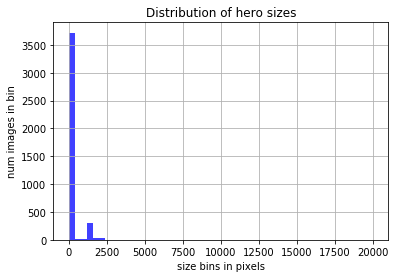

total images with 0 pixels to 20000 pixels = 4131.0


In [8]:
hero_distribution(num_blues, 'Distribution of hero sizes', 50, (0, 20000), 'blue')

[1, 120) - 1014
[120, 240) - 72
[240, 360) - 44
[360, 480) - 20
[480, 600) - 6
[600, 720) - 1
[720, 840) - 7
[840, 960) - 4
[960, 1080) - 3
[1080, 1200) - 7
[1200, 1320) - 11
[1320, 1440) - 144
[1440, 1560) - 141
[1560, 1680) - 26
[1680, 1800) - 17
[1800, 1920) - 2
[1920, 2040) - 3
[2040, 2160) - 13
[2160, 2280) - 14
[2280, 2400) - 0


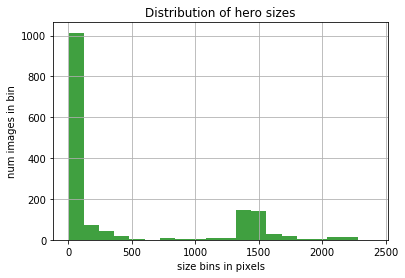

total images with 1 pixels to 2400 pixels = 1549.0


In [9]:
hero_distribution(num_blues, 'Distribution of hero sizes', 20, (1, 2400), 'green')

[1, 50) - 672
[50, 100) - 320
[100, 150) - 41
[150, 200) - 35
[200, 250) - 21
[250, 300) - 18
[300, 350) - 20
[350, 400) - 15
[400, 450) - 4
[450, 500) - 5
[500, 550) - 1
[550, 600) - 4
[600, 650) - 0
[650, 700) - 1
[700, 750) - 2
[750, 800) - 3
[800, 850) - 3
[850, 900) - 0
[900, 950) - 3
[950, 1000) - 0


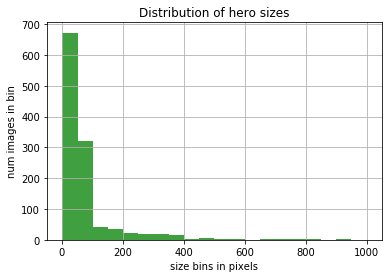

total images with 1 pixels to 1000 pixels = 1168.0


In [10]:
hero_distribution(num_blues, 'Distribution of hero sizes', 20, (1, 1000), 'green')

[1001, 1070) - 2
[1070, 1140) - 4
[1140, 1210) - 5
[1210, 1280) - 3
[1280, 1350) - 15
[1350, 1420) - 87
[1420, 1490) - 136
[1490, 1560) - 54
[1560, 1630) - 17
[1630, 1700) - 12
[1700, 1770) - 9
[1770, 1840) - 5
[1840, 1910) - 2
[1910, 1980) - 2
[1980, 2050) - 1
[2050, 2120) - 2
[2120, 2190) - 20
[2190, 2260) - 5
[2260, 2330) - 0
[2330, 2400) - 0


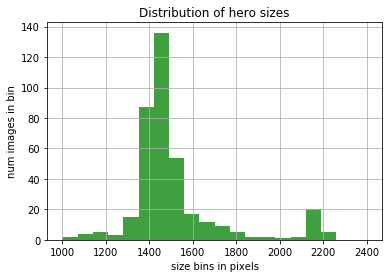

total images with 1001 pixels to 2400 pixels = 381.0


In [11]:
hero_distribution(num_blues, 'Distribution of hero sizes', 20, (1001, 2400), 'green')

[0, 0) - 2576
[0, 0) - 0


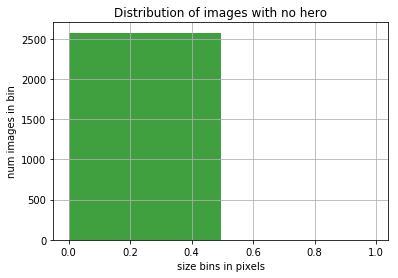

total images with 0.0 pixels to 0.99 pixels = 2576.0


In [12]:
hero_distribution(num_blues, 'Distribution of images with no hero', 2, (0.0, 0.99), 'green')

[1, 20) - 109
[20, 40) - 412
[40, 60) - 311
[60, 80) - 147
[80, 100) - 13
[100, 120) - 22
[120, 140) - 11
[140, 160) - 17
[160, 180) - 13
[180, 200) - 13
[200, 220) - 13
[220, 240) - 5
[240, 260) - 5
[260, 280) - 8
[280, 300) - 8
[300, 320) - 10
[320, 340) - 7
[340, 360) - 6
[360, 380) - 10
[380, 400) - 2


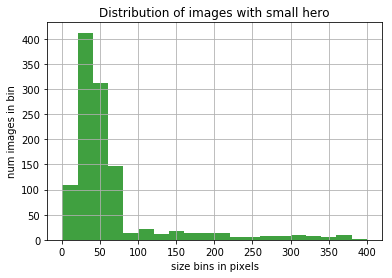

total images with 1 pixels to 400 pixels = 1142.0


In [13]:
hero_distribution(num_blues, 'Distribution of images with small hero', 20, (1, 400), 'green')

[401, 500) - 9
[500, 600) - 5
[600, 700) - 1
[700, 800) - 5
[800, 900) - 3
[900, 1000) - 3
[1000, 1100) - 3
[1100, 1200) - 7
[1200, 1300) - 6
[1300, 1400) - 65
[1400, 1500) - 184
[1500, 1600) - 53
[1600, 1700) - 17
[1700, 1800) - 14
[1800, 1900) - 2
[1900, 2000) - 2
[2000, 2100) - 3
[2100, 2200) - 23
[2200, 2300) - 2
[2300, 2400) - 0


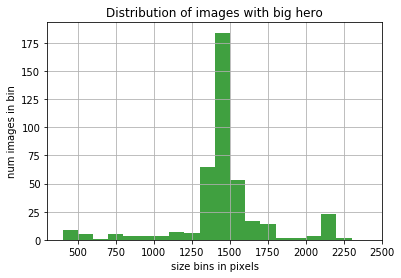

total images with 401 pixels to 2400 pixels = 407.0


In [14]:
hero_distribution(num_blues, 'Distribution of images with big hero', 20, (401, 2400), 'green')

[1, 2) - 13
[2, 4) - 13
[4, 6) - 5
[6, 8) - 13
[8, 10) - 7
[10, 12) - 6
[12, 14) - 15
[14, 16) - 12
[16, 18) - 11
[18, 20) - 14
[20, 22) - 15
[22, 24) - 21
[24, 26) - 41
[26, 28) - 43
[28, 30) - 46
[30, 32) - 56
[32, 34) - 49
[34, 36) - 53
[36, 38) - 56
[38, 40) - 32


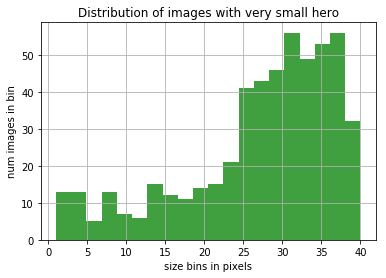

total images with 1 pixels to 40 pixels = 521.0


In [15]:
hero_distribution(num_blues, 'Distribution of images with very small hero', 20, (1, 40), 'green')

[41, 58) - 281
[58, 76) - 158
[76, 94) - 28
[94, 112) - 14
[112, 130) - 17
[130, 148) - 13
[148, 166) - 15
[166, 184) - 9
[184, 202) - 12
[202, 220) - 13
[220, 238) - 5
[238, 256) - 5
[256, 274) - 7
[274, 292) - 6
[292, 310) - 9
[310, 328) - 8
[328, 346) - 3
[346, 364) - 6
[364, 382) - 10
[382, 400) - 2


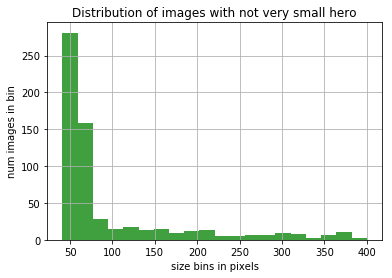

total images with 41 pixels to 400 pixels = 621.0


In [16]:
hero_distribution(num_blues, 'Distribution of images with not very small hero', 20, (41, 400), 'green')

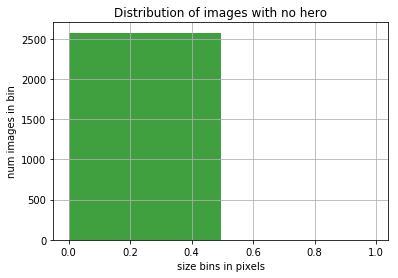

total images with 0.0 pixels to 0.99 pixels = 2576.0


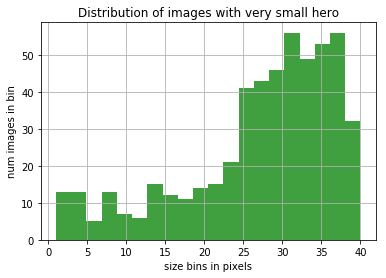

total images with 1 pixels to 40 pixels = 521.0


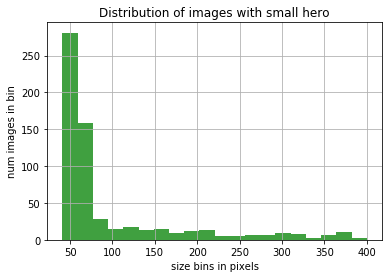

total images with 41 pixels to 400 pixels = 621.0


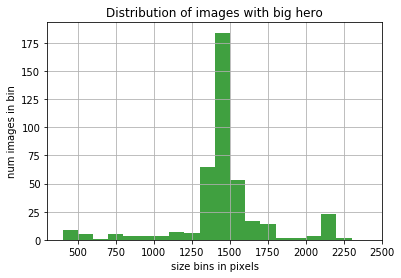

total images with 401 pixels to 2400 pixels = 407.0


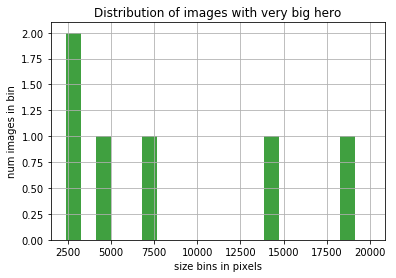

total images with 2401 pixels to 20000 pixels = 6.0


In [17]:
hero_distribution(num_blues, 'Distribution of images with no hero', 2, (0.0, 0.99), 'green', False)
hero_distribution(num_blues, 'Distribution of images with very small hero', 20, (1, 40), 'green', False)
hero_distribution(num_blues, 'Distribution of images with small hero', 20, (41, 400), 'green', False)
hero_distribution(num_blues, 'Distribution of images with big hero', 20, (401, 2400), 'green', False)
hero_distribution(num_blues, 'Distribution of images with very big hero', 20, (2401, 20000), 'green', False)

In [18]:
no_hero = (0, 1)
very_small_hero = (1, 40)
small_hero = (40, 400)
big_hero = (400, 2400)
very_big_hero = (2400, 20000)

In [19]:
def image_2_mask(image):
    
    mask = image.replace('/images/', '/masks/')
    mask = mask.replace('.jpeg', '.png')
    
    # replace _cam1_ with _mask_
    mask = re.sub('_cam\d_', '_mask_', mask)

    # replace _run3cam1_ with _run3_mask_
    mask = re.sub('(?<=_run\d)cam\d_', '_mask_', mask)
    
    if not os.path.isfile(mask):
        print(image)
        print(mask)
    
    return mask


def mask_2_image(mask):
    
    # TODO: implement this
    
    raise NotImplementedError('not implemented yet!')
    
    image = mask.replace('/masks/', '/images/')
    image = image.replace('.png', '.jpeg')
    
    # replace _cam1_ with _mask_
    image = re.sub('_cam\d_', '_mask_', image)

    # replace _run3cam1_ with _run3_mask_
    image = re.sub('(?<=_run\d)cam\d_', '_mask_', image)
    
    return image    

In [20]:
def get_hero_pix(mask):
    
    msk = cv2.imread(mask)
    blue = msk[:,:,0]
    num_blue_pix = np.count_nonzero(blue)
    
    return num_blue_pix

In [21]:
def get_random_image_pair(data_dir, group, hero=None):
    """
    
    Args:
        group: can be 'train' or 'validation'
    
    """
    img_dir_path = os.path.join(data_dir, group, 'images', '*.jpeg')
    images = glob.glob(img_dir_path)
    
    hero_pix = 0
    while(hero is None or hero_pix < hero[0] or hero_pix >= hero[1]):
        index = np.random.randint(len(images))
        image = images[index]
        mask = image_2_mask(image)
        if hero is None:
            break
        hero_pix = get_hero_pix(mask)
    
    return image, mask

In [22]:
def plot_random_image_pair(image, mask):

    fig = plt.figure(figsize=(16, 8))
    
    a = fig.add_subplot(1,2,1)
    img = mpimg.imread(image)
    imgplot = plt.imshow(img)
    
    a.set_title('Image')
    a.axis('off')

    a = fig.add_subplot(1,2,2)
    msk = mpimg.imread(mask)
    imgplot = plt.imshow(msk)
    a.set_title('Mask')
    a.axis('off')

In [23]:
def flip_image(img_file, fliptype=None):
    flip_func = {
        'lr': lambda x: np.fliplr(x),
        'ud': lambda x: np.flipud(x),
        'rl': lambda x: np.rot90(x, 1, (0,1)),
        'rr': lambda x: np.rot90(x, -1, (0,1))
    }
    
    if fliptype is None:
        fliptype = random.choice(['lr', 'ud', 'rl', 'rr'])
    
    img = misc.imread(img_file, flatten=False, mode='RGB')
    flipped_img = flip_func[fliptype](img)
    
    flipped_name = 'flipped_' + os.path.basename(img_file)
    # flipped_path = os.path.join(img_dir, flipped_name)
    misc.imsave(flipped_name, flipped_img)
    return flipped_name

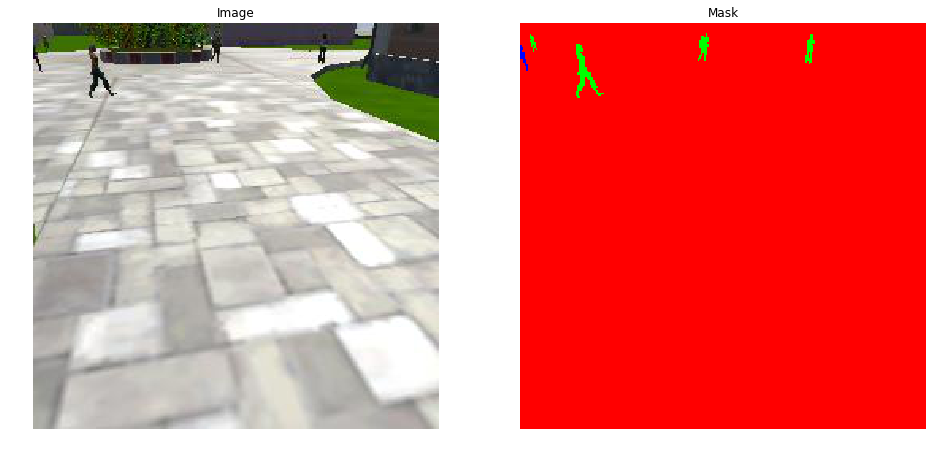

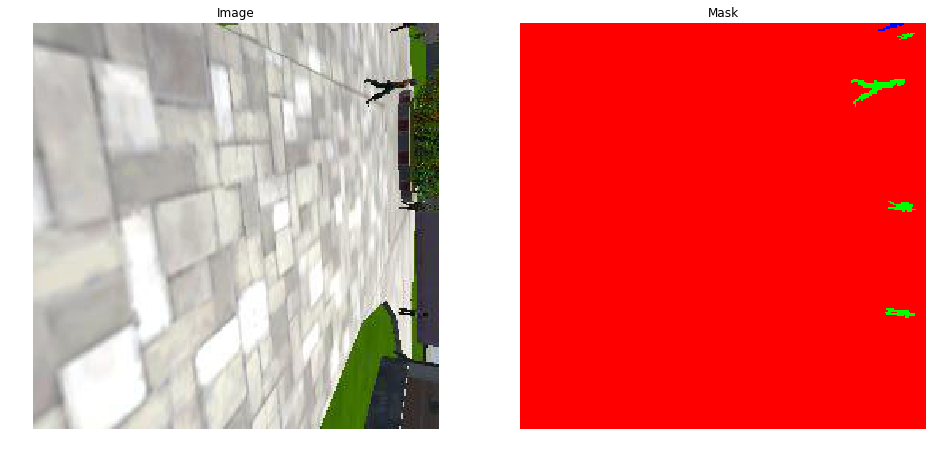

In [24]:
group = 'train'
hero = very_small_hero

image_file, mask_file = get_random_image_pair(data_dir, group, hero)
plot_random_image_pair(image_file, mask_file)
plot_random_image_pair(flip_image(image_file, 'rr'), flip_image(mask_file, 'rr'))

In [25]:
num_total = 4131
num_no_hero = 2576
num_very_small_hero = 521
num_small_hero = 621
num_big_hero = 407
num_very_big_hero = 6
print(num_no_hero + num_very_small_hero + num_small_hero + num_big_hero + num_very_big_hero)

4131


In [26]:
print(2576 * 2)
print((521 + 621) * 4)
print(407 * 4)
print(2576 * 2 + (521 + 621) * 4 + 407 * 4)

5152
4568
1628
11348


In [27]:
def classify_images(data_dir, group, hero_sizes=[(0,1), (1, 400), (400, 256*256)]):
    
    img_dir_path = os.path.join(data_dir, group, 'images', '*.jpeg')
    images = glob.glob(img_dir_path)
    
    classified_images = defaultdict(list)
    for image in images:
        mask = image_2_mask(image)
        hero_pix = get_hero_pix(mask)
        for hero_size in hero_sizes:
            if hero_pix < hero_size[1]:
                classified_images[hero_size[1]].append((image, mask))
                break
    
    return classified_images

In [28]:
def flip_n_save(img_files, amp, dryrun=True):
    flip_func = {
        'lr': lambda x: np.fliplr(x),
        'ud': lambda x: np.flipud(x),
        'rl': lambda x: np.rot90(x, 1, (0,1)),
        'rr': lambda x: np.rot90(x, -1, (0,1))
    }
    
    for img_file, msk_file in img_files:
        img = misc.imread(img_file, flatten=False, mode='RGB')
        msk = misc.imread(msk_file, flatten=False, mode='RGB')
        for fliptype in sorted(flip_func.keys())[:amp]:
            flipped_img = flip_func[fliptype](img)
            flipped_msk = flip_func[fliptype](msk)
            flip_image = 'flip_' + fliptype + '_' + os.path.basename(img_file)
            flip_mask = 'flip_' + fliptype + '_' + os.path.basename(msk_file)
            flip_image_path = os.path.join(os.path.dirname(img_file), flip_image)
            flip_mask_path = os.path.join(os.path.dirname(msk_file), flip_mask)
            if not dryrun:
                misc.imsave(flip_image_path, flipped_img)
                misc.imsave(flip_mask_path, flipped_msk)
            else:
                print(flip_image_path)
                print(flip_mask_path)

In [29]:
grouped_train_dict = classify_images(data_dir, 'train')

In [30]:
grouped_validation_dict = classify_images(data_dir, 'validation')

In [31]:
for key, val in sorted(grouped_train_dict.items()):
    print(key, len(val))

1 2576
400 1142
65536 413


In [32]:
for key, val in sorted(grouped_validation_dict.items()):
    print(key, len(val))

1 885
400 114
65536 185


In [33]:
print(grouped_train_dict[65536][0])

('/Users/srini/Coursework/RoboND/robond-github/RoboND-DeepLearning-Project/data/train/images/8_run5cam1_00037.jpeg', '/Users/srini/Coursework/RoboND/robond-github/RoboND-DeepLearning-Project/data/train/masks/8_run5_mask_00037.png')


In [34]:
# flip_n_save(grouped_train_dict[65536], 4, dryrun=False)

In [35]:
# flip_n_save(grouped_train_dict[400], 4, dryrun=False)

In [36]:
# flip_n_save(grouped_train_dict[1], 2, dryrun=False)

In [37]:
# flip_n_save(grouped_validation_dict[65536], 4, dryrun=False)
# flip_n_save(grouped_validation_dict[400], 4, dryrun=False)

In [38]:
def plot_images(images, grid_size, fig_size, fig_spacing=(0.01, 0.01)):
    gs = gridspec.GridSpec(grid_size[0], grid_size[1])
    gs.update(wspace=fig_spacing[0], hspace=fig_spacing[1])
    plt.figure(figsize=fig_size)

    for i in range(len(images)):
        plt.subplot(gs[i])
        image = images[i].squeeze()
        if len(image.shape) == 2:
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image)
        plt.axis('off')

    plt.show()

In [39]:
def get_random(base, diff):
    x = base
    while base - diff/2. < x < base + diff/2:
        x = np.random.uniform(low = base - diff, high = base + diff)
    return x

def translate(image, shift_range=(4, 4)):
    rows, cols = image.shape[:2]
    
    tx = get_random(0, shift_range[0])
    ty = get_random(0, shift_range[1])
    
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    
    shifted = cv2.warpAffine(image, M, (cols, rows))
    
    return shifted

def rotate(image, angle_range=15):
    rows, cols = image.shape[:2]
    
    angle = get_random(0, angle_range)
    
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    
    rotated = cv2.warpAffine(image, M, (cols, rows))
    
    return rotated

def affine_transform(image):
    rows, cols = image.shape[:2]
    
    x = np.random.uniform(low=0.75, high=1)
    
    p0 = [[cols/8, rows/8],
          [cols * (1+x)/8, rows/8],
          [cols/8, rows * (1+x)/8]] 
    p1 = [[cols * 7/8, rows/8],
          [cols * 7/8, rows * (1+x)/8],
          [cols * (7-x)/8, rows/8]]
    p2 = [[cols/8, rows * 7/8],
          [cols/8, rows * (7-x)/8],
          [cols * (1+x)/8, rows * 7/8]]
    p3 = [[cols * 7/8, rows * 7/8],
          [cols * (7-x)/8, rows * 7/8],
          [cols * 7/8, rows * (7-x)/8]]

    all_pts = np.float32([p0, p1, p2, p3])
    
    remove_pt = np.random.randint(4)
    sel_dir = np.random.randint(low=1, high=3)
    
    pts1 = np.float32([p0[0], p1[0], p2[0]])
    pts2 = np.float32([p0[sel_dir], p1[sel_dir], p2[sel_dir]])
    
    M = cv2.getAffineTransform(pts1,pts2)

    affined = cv2.warpAffine(image,M,(cols,rows))

    return affined

In [47]:
def get_more_images(image, count):
    
    more_images = []
    
    for i in range(count):  
        shifted = translate(image)
        rotated = rotate(shifted, 90)
        # affined = affine_transform(rotated)
        more_images.append(rotated)
    
    more_images = np.asarray(more_images)    
    return more_images

In [41]:
def plot_augmentation_sample():
    
    # Plot a random image and generate bunch of fake data based on that image
    print('Random image from the Training set')
    rnd_idx = plot_random_image(X_train, y_train, signnames)
    
    print("\nA sample of 'Fake Data'")
    more = get_more_images(X_train[rnd_idx].squeeze(), 100)
    plot_images(more, (10, 10), (10, 10), fig_spacing=(0.02, 0.04))

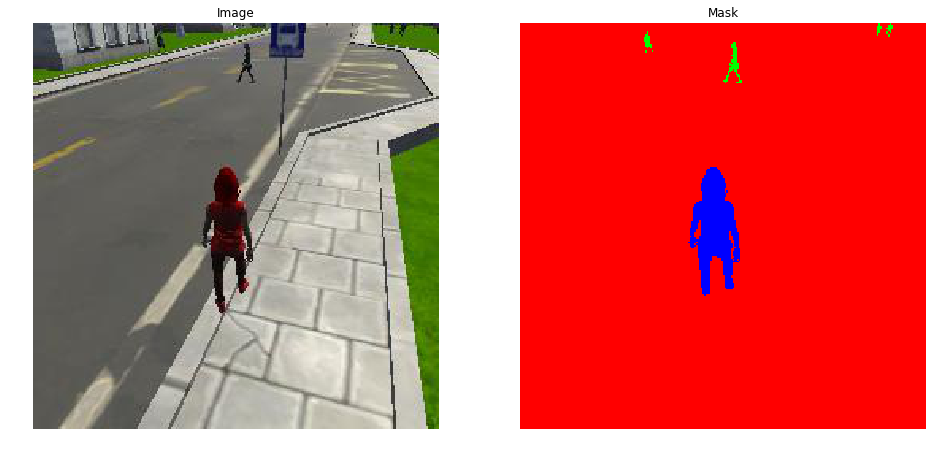

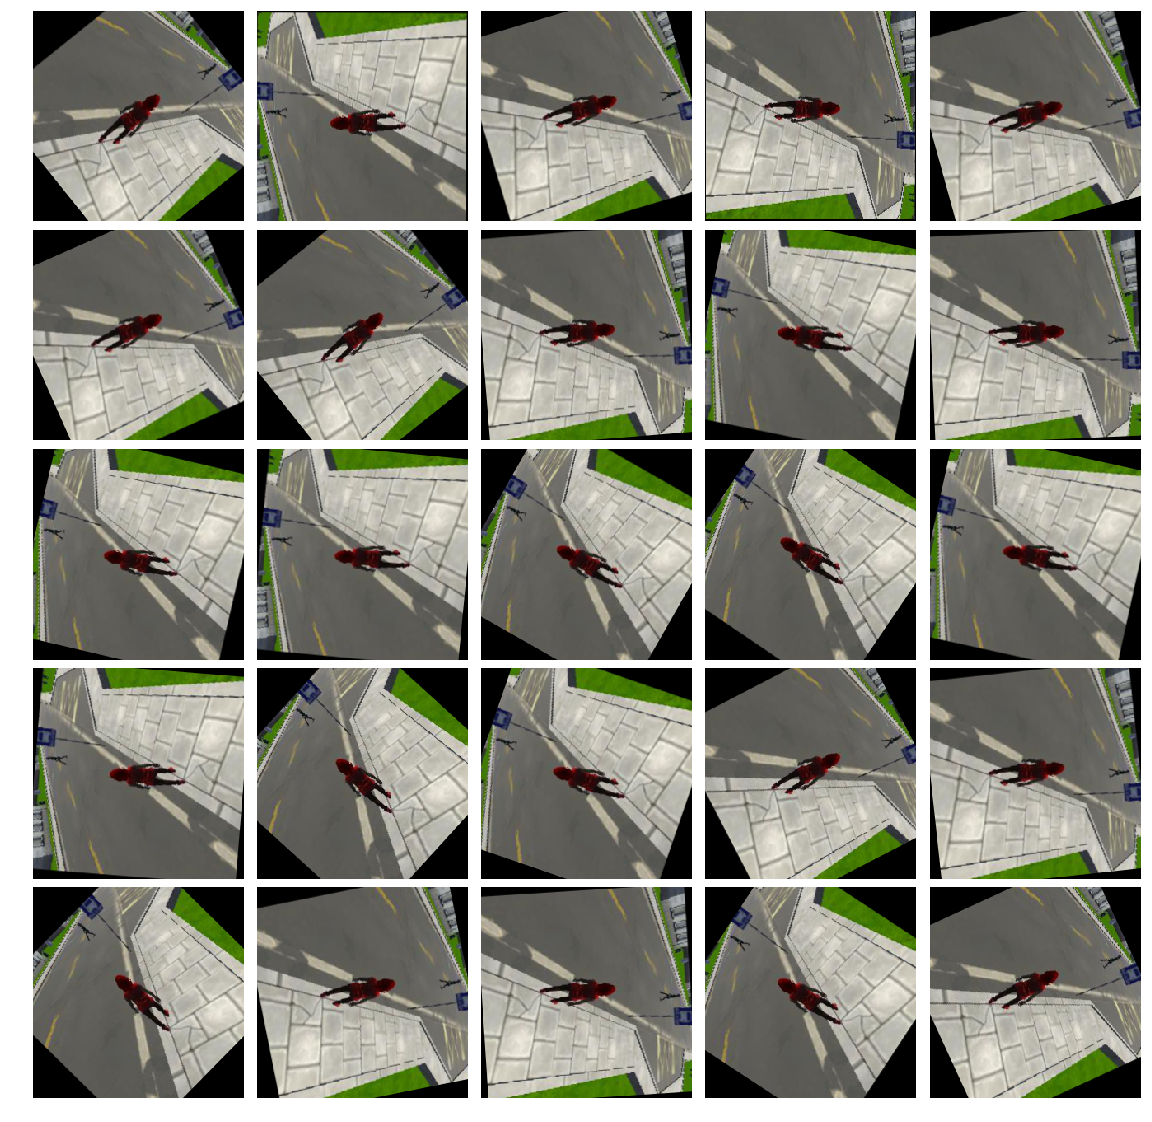

In [54]:
group = 'train'
hero = big_hero

image_file, mask_file = get_random_image_pair(data_dir, group, hero)
plot_random_image_pair(image_file, mask_file)

image = misc.imread(image_file, flatten=False, mode='RGB')

more = get_more_images(image, 25)
plot_images(more, (5, 5), (20, 20), fig_spacing=(0.02, 0.04))

In [55]:
grouped_train_dict = classify_images(data_dir, 'train')
for key, val in sorted(grouped_train_dict.items()):
    print(key, len(val))

1 2576
400 1142
65536 413


In [64]:
group = 'train'

img_dir_path = os.path.join(data_dir, group, 'images', '*.jpeg')
mask_dir_path = os.path.join(data_dir, group, 'masks', '*.png')

images = sorted(glob.glob(img_dir_path))
masks = sorted(glob.glob(mask_dir_path))

assert len(images) == len(masks), 'Number of images and masks are not same'

In [65]:
for i in range(100):
    rand_idx = np.random.randint(len(images))
    assert masks[rand_idx] == image_2_mask(images[rand_idx])

In [70]:
def augument_data(data_dir, group, dry_run=True):

    grouped_train_dict = classify_images(data_dir, group)
    counts = [(k, len(v))  for k, v in sorted(grouped_train_dict.items())]
    
    max_count = max(counts, key=lambda x: x[1])[1] 

    for k, count in counts:
        print(k, count)
        new_ratio, rem = divmod(max_count - count, count)
        print(new_ratio, rem)
        
#         image_mask_pairs = grouped_train_dict[k]
        
#         if new_ratio > 0:
#             for image, mask in image_mask_pairs:
#                 new_imgs = get_more_images(img, new_ratio)
        
#         for i in range(rem):
#             rand_idx = np.random.randint(len(image_mask_pairs))
#             image, mask = image_mask_pairs[rand_idx]
#             new_imgs = get_more_images(img, 1)
    

In [71]:
augument_data(data_dir, 'train')

1 2576
0 0
400 1142
1 292
65536 413
5 98
